### SETTINGS, IMPORT AND LOAD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### OVERVIEW DATA ANALYSIS

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [5]:
df.describe(include=['object', 'bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,4572-DVCGN,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### CHECKING & CORRECTION MISSING VALUES

In [7]:
df.isnull().sum()       # Count the Null Columns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### CHECKING & CORRECTION MISMATCHED VALUES

In [8]:
df['TotalCharges'][df['TotalCharges'] == ' '] = '0'  # verifica as linhas 'TotalCharges' == ' ' e atribui '0'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])  # transforma a coluna de string para numérico

df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"}) #replace values numerical to categorical

#replace 'No internet service' to 'No' for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

df['MultipleLines']  = df['MultipleLines'].replace({'No phone service' : 'No'})     #replace 'No phone service' to 'No'

### EXPLORATORY DATA ANALYSIS

In [9]:
# Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

# Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

print('NORMALIZED CHURN VALUE COUNTS')
print(df.Churn.value_counts(normalize=True))     # mostra distribuição do target normalizada

NORMALIZED CHURN VALUE COUNTS
No    0.73
Yes   0.27
Name: Churn, dtype: float64


### HISTOGRAM - NUMERIC COLUMNS

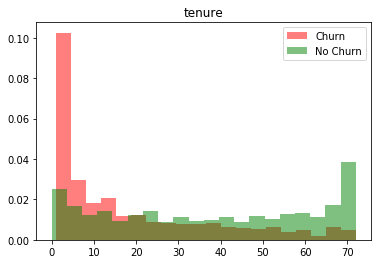

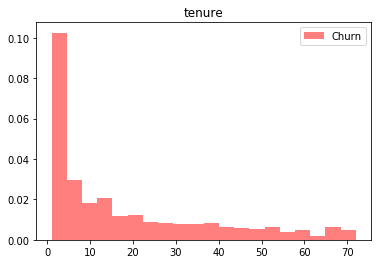

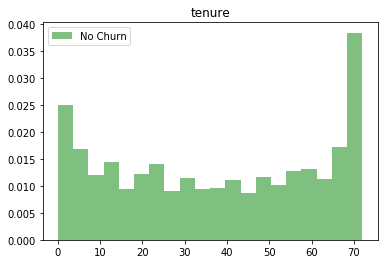

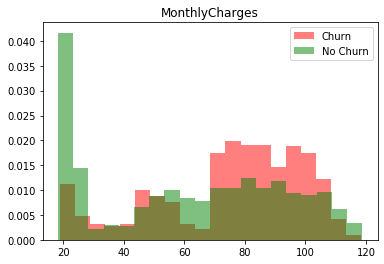

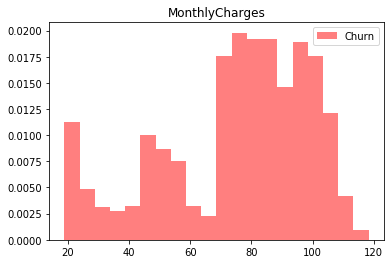

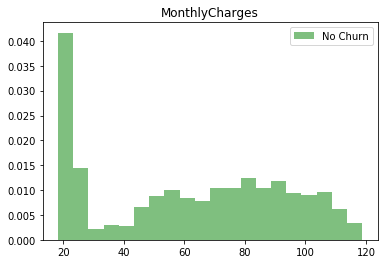

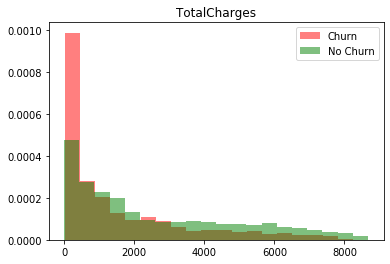

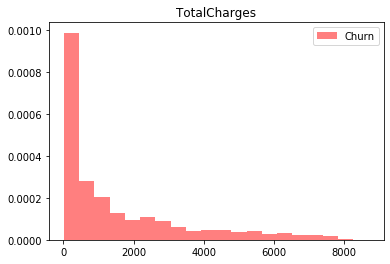

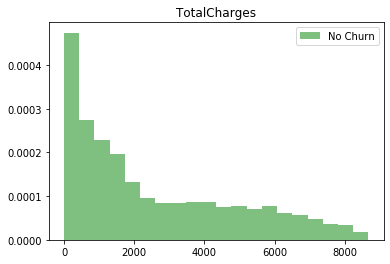

In [10]:
# Show histogram for all numerical columns. Churn and No Churn distribution
for c in num_cols:
    plt.figure()
    plt.title(c)
    plt.hist(df[df.Churn == 'Yes'][c], normed=True, bins=20, color='r', alpha=0.5, label='Churn')
    plt.hist(df[df.Churn == 'No'][c], normed=True, bins=20, color='g', alpha=0.5, label='No Churn')
    plt.legend()
    plt.figure()
    plt.title(c)
    plt.hist(df[df.Churn == 'Yes'][c], normed=True, bins=20, color='r', alpha=0.5, label='Churn')
    plt.legend()
    plt.figure()
    plt.title(c)
    plt.hist(df[df.Churn == 'No'][c], normed=True, bins=20, color='g', alpha=0.5, label='No Churn')
    plt.legend()

### BAR PLOT

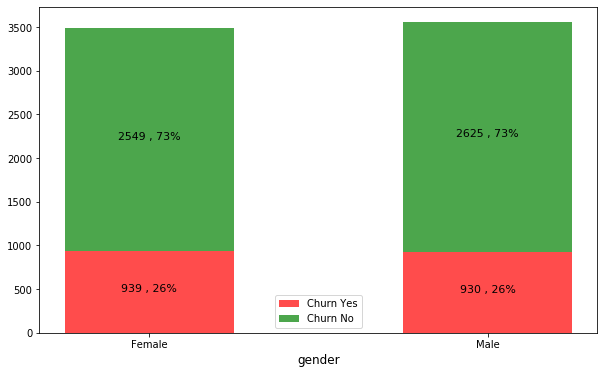

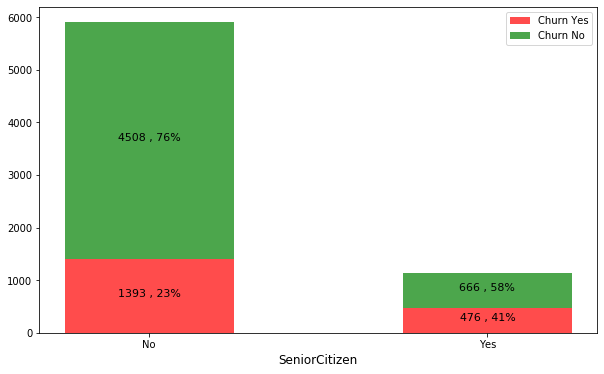

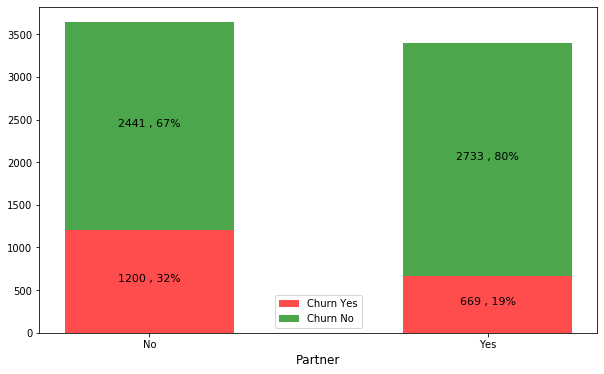

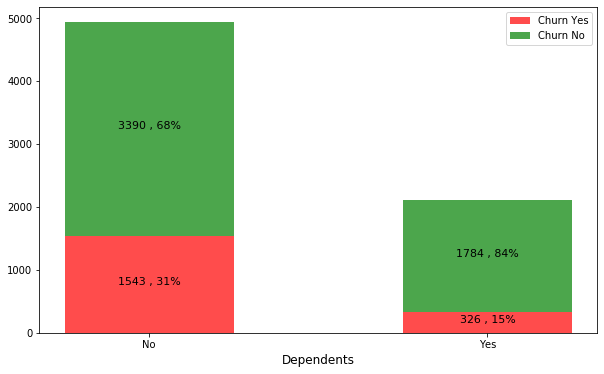

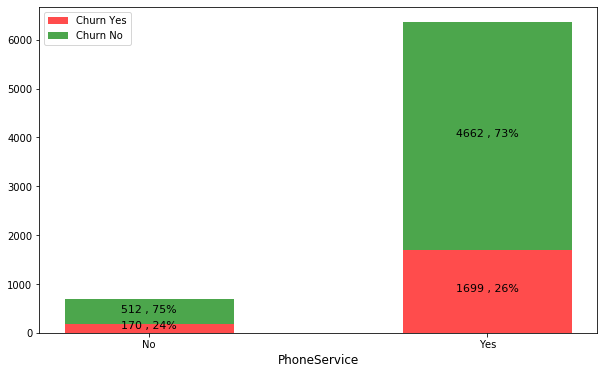

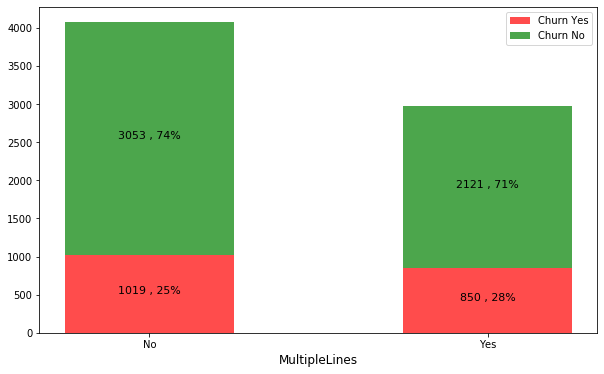

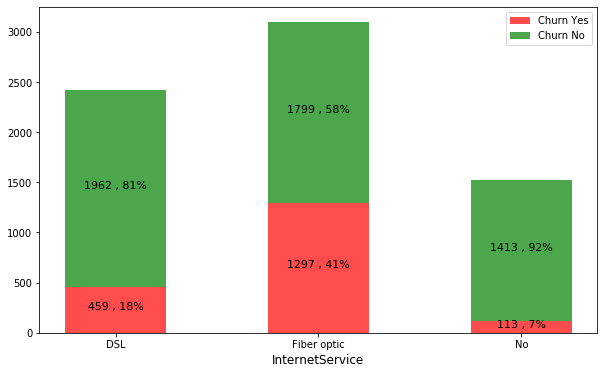

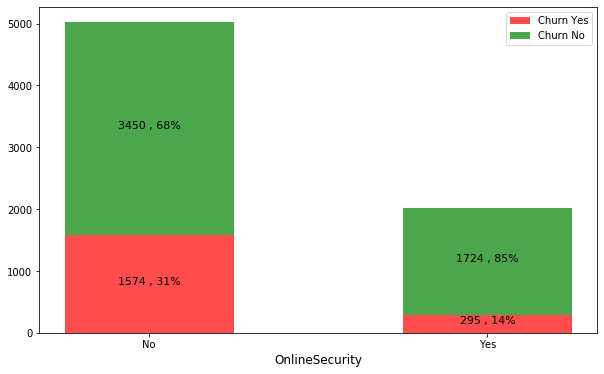

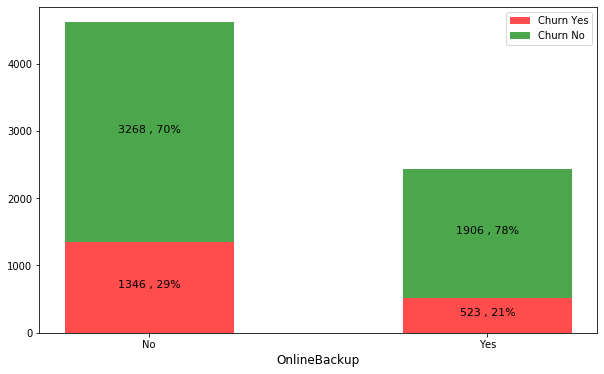

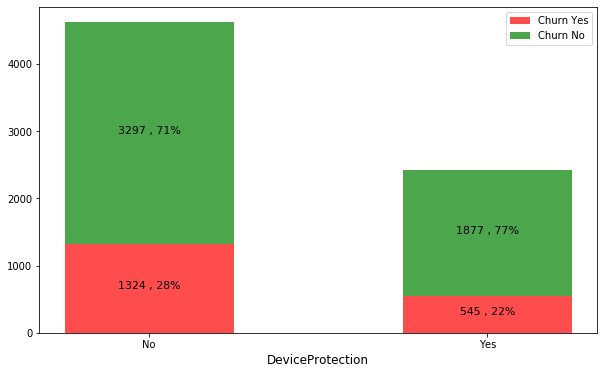

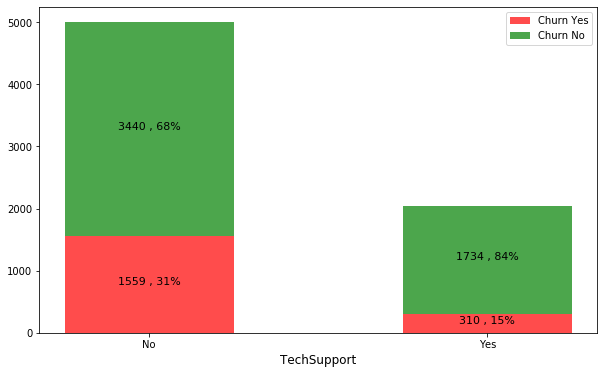

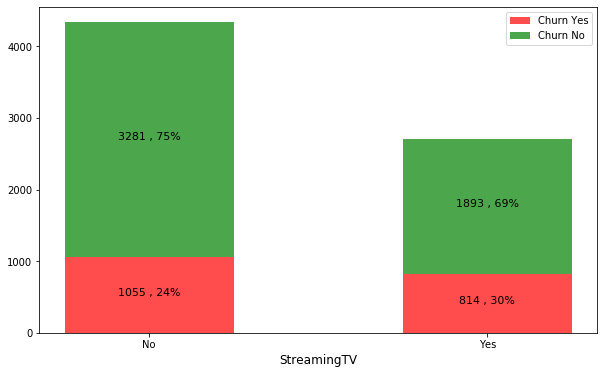

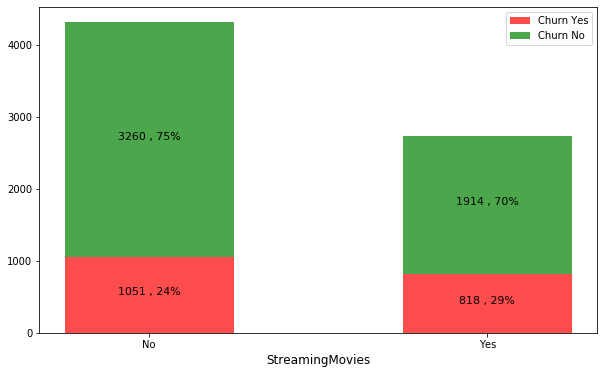

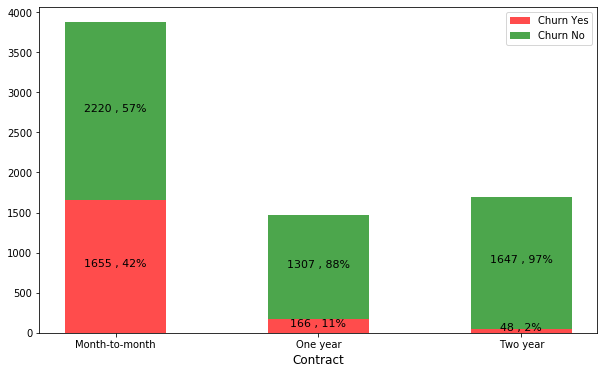

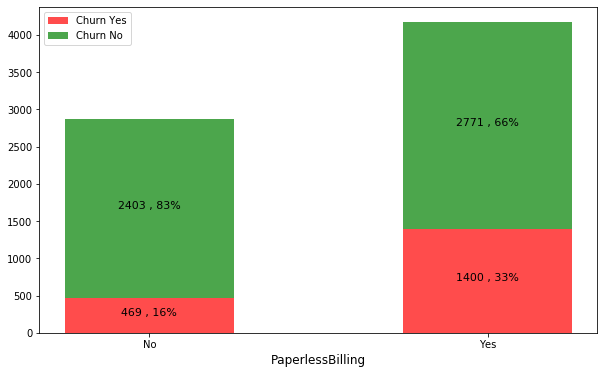

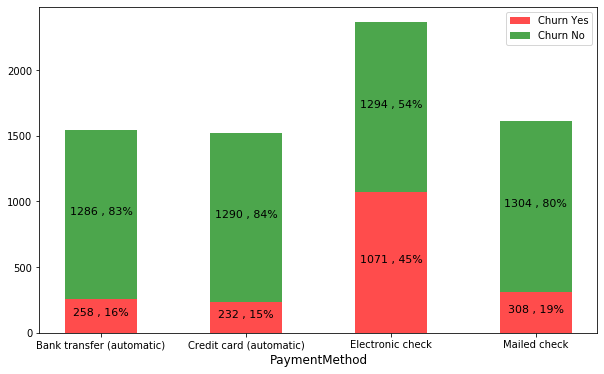

In [11]:
# Show bar chart for all categorical columns. Churn and No Churn groups

for c in cat_cols:
    sum_values = df.groupby(['Churn', c]).agg(np.count_nonzero).iloc[:,0]
    yes_values = sum_values.loc['Yes'].values
    no_values = sum_values.loc['No'].values
    xvals = list(sum_values.loc['Yes'].index)
    yes_values_norm = []
    no_values_norm = []
    for x in xvals:
        tot = sum_values.loc[:,x].sum()
        yes_values_norm.append(sum_values.loc['Yes',x] / tot)
        no_values_norm.append(sum_values.loc['No',x] / tot)
        
    # xvals_str = [str(x) for x in xvals]
    plt.figure(figsize=(10,6))
    plt.xlabel(c,  fontsize=12)
    bars_yes = plt.bar(xvals, yes_values, width=0.5, label='Churn Yes', color='r', alpha=0.7)
    bars_no = plt.bar(xvals, no_values, width=0.5, bottom=yes_values, label='Churn No', color='g', alpha=0.7)
    plt.legend()

    # direct label each bar with Y axis values
    for i, bar in enumerate(bars_yes):
        height = bar.get_height()
        width = bar.get_width()
        plt.gca().text(bar.get_x() + width/2, height * (1/2), str(int(height)) + ' , ' + str(int(yes_values_norm[i]*100)) + '%', ha='center', 
        color='black', fontsize=11)

    for i, bar in enumerate(bars_no):
        height = bar.get_height()
        width = bar.get_width()
        plt.gca().text(bar.get_x() + width/2, (height * (1/2)) + yes_values[i], str(int(height)) + ' , ' + str(int(no_values_norm[i]*100)) + '%', 
        ha='center', color='black', fontsize=11)

### DATA PREPROCESSING

In [12]:
# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

### FEATURE SELECTION

In [13]:
features = [i for i in df.columns if i not in Id_col + target_col]
X = df[features]
y = df['Churn']

### Synthetic Minority Oversampling TEchnique (SMOTE)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote_X = df[features]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y, test_size = .25 , random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=features)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

### Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

clf_base = GradientBoostingClassifier()

rfe = RFE(clf_base,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in df.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
features = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
X = df[features]

### MODELING

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 4, random_state = 0)
   
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf.fit(X_train, y_train)

### EVALUATION

In [23]:
y_proba_lr = clf.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

y_predicted = clf.predict(X_test)
clr = classification_report(y_test, y_predicted, target_names = ['0', '1'])

print('score train:', clf.score(X_train, y_train))
print('score test:', clf.score(X_test, y_test))
print('')
print('AUC', roc_auc_lr)
print('')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predicted))
print('')
print(clr)
print('')
feature_importances1 = pd.DataFrame(clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
pd.set_option('display.float_format', '{:.6f}'.format)
feature_importances1

score train: 0.8436198409693298
score test: 0.7768313458262351

AUC 0.8244358324985773

Confusion Matrix
[[1131  167]
 [ 226  237]]

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1298
           1       0.59      0.51      0.55       463

    accuracy                           0.78      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761




,importance
Contract_Month-to-month,0.388247
tenure,0.158231
TotalCharges,0.136396
MonthlyCharges,0.135372
InternetService_Fiber optic,0.098715
PaymentMethod_Electronic check,0.040301
InternetService_No,0.017559
OnlineSecurity,0.016041
Contract_Two year,0.004741
Contract_One year,0.004396


### PREDICTING SAMPLE CASE

In [25]:
def set_contract(contract):
    Contract_Month_to_month = 0
    Contract_Two_year = 0
    Contract_One_year = 0
    if contract == 'M':
        Contract_Month_to_month = 1
    elif contract == 'T':
        Contract_Two_year = 1
    else:
        Contract_One_year = 1    
    return (Contract_Month_to_month, Contract_Two_year, Contract_One_year)

def set_internet(internet):
    Internet_Fiber = 0
    Internet_No = 0
    if internet == 'F':
        Internet_Fiber = 1
    elif internet == 'N':
        Internet_No = 1
    return (Internet_Fiber, Internet_No)

In [26]:
X_sim = pd.DataFrame(columns=X_test.columns)

contract = 'M'                                      # {'M': 'Month-to-month', 'T': 'Two year', 'O': 'One year'} Churn Rate: 'M': 42%, 'O': 11%, 'T': 2%
X_sim.at[0, 'Contract_Month-to-month'], X_sim.at[0, 'Contract_Two year'], X_sim.at[0, 'Contract_One year'] = set_contract(contract)
X_sim.at[0, 'tenure'] = 27                          # Churn Yes: mean 17.9 min 1 median 10 max 72; Churn No: mean 37.5 min 0 median 38 max 72
X_sim.at[0, 'TotalCharges'] = 2135.5                # Churn Yes: mean 1531 min 18 median 703 max 8684; Churn No: mean 2549 min 0 median 1679 max 8672
X_sim.at[0, 'MonthlyCharges'] = 78.05               # Churn Yes: mean 74 min 18 median 79 max 118; Churn No: mean 61 min 18 median 64 max 118
internet = 'F'                                      # {'D': 'DSL', 'F': 'Fiber optic', 'N': 'No'} Churn Rate: 'D': 18%, 'F': 41%, 'N': 7%
X_sim.at[0, 'InternetService_Fiber optic'], X_sim.at[0, 'InternetService_No'] = set_internet(internet)
paymentMethod = 'E'                                 # {'B': 'Bank Transfer',  'C': 'Credit Card', 'E': 'Electronic check', 'M': 'Mailed Check'} 
                                                    # Churn Rate: 'B': 16%, 'C': 15%, 'E': 45%, 'M': 19%
X_sim.at[0, 'PaymentMethod_Electronic check'] = 1 if paymentMethod == 'E' else 0
X_sim.at[0, 'OnlineSecurity'] = 0                   # Churn Rate: Without OnlineSecurity: 31%; With OnlineSecurity: 14%

scaled = std.transform(X_sim[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
X_sim_og = X_sim.copy()
X_sim = X_sim.drop(columns = num_cols,axis = 1)
X_sim = X_sim.merge(scaled,left_index=True,right_index=True,how = "left")

y_predicted_sim = clf.predict(X_sim)
if y_predicted_sim == 1:
    print('CHURN')
else:
    print('NO CHURN')

CHURN
